# P5 - Notebook Analyse Exploratoire

In [ ]:
# Import des packages :
!pip install --upgrade scikit-learn
!pip install yellowbrick
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
from datetime import datetime
from sklearn.compose import make_column_transformer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 39.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
# Import du jeu de données
data = pd.read_csv("/content/drive/My Drive/Formation/Notebooks/jeu_donnees_final_maintenance.csv", sep=',',
                    index_col="customer_unique_id", parse_dates=["last_purchase_date", "first_purchase_date"])

### 1. Visualisation du dataset, modifications/créations de variable

#### 1.1. Informations générales

In [ ]:
data.head()

,nb_orders,last_purchase_date,first_purchase_date,mean_delivery_delay,max_delivery_delay,mean_review_score,max_review_score,min_review_score,largest_payment_type,mean_payment_installments,max_payment_installments,mean_nb_pdt_orders,max_nb_pdt_orders,total_price,mean_order_price,largest_product_category_name
customer_unique_id,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,2018-05-10 10:56:27,4.132905,4.132905,5.0,5.0,5.0,credit_card,8.0,8.0,1.0,1.0,141.90,141.90,bed_bath_table
0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,2018-05-07 11:11:27,4.248125,4.248125,4.0,4.0,4.0,credit_card,1.0,1.0,1.0,1.0,27.19,27.19,health_beauty
0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,2017-03-10 21:05:03,1.389734,1.389734,3.0,3.0,3.0,credit_card,8.0,8.0,1.0,1.0,86.22,86.22,stationery
0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,2017-10-12 20:29:41,11.108970,11.108970,4.0,4.0,4.0,credit_card,4.0,4.0,1.0,1.0,43.62,43.62,telephony
0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,2017-11-14 19:45:42,7.035463,7.035463,5.0,5.0,5.0,credit_card,6.0,6.0,1.0,1.0,196.89,196.89,telephony


In [ ]:
# Période que couvre le dataset :
print(f"Début de période : {data['first_purchase_date'].min()}, fin de période : {data['last_purchase_date'].max()}")

Début de période : 2016-09-04 21:15:19, fin de période : 2018-10-17 17:30:18


On a donc un dataset allant du 04/09/2016 au 17/10/2018.

In [ ]:
data.loc[data["total_price"].idxmax(), :]

nb_orders                                          1
last_purchase_date               2017-09-29 15:24:52
first_purchase_date              2017-09-29 15:24:52
mean_delivery_delay                         5.234387
max_delivery_delay                          5.234387
mean_review_score                                1.0
max_review_score                                 1.0
min_review_score                                 1.0
largest_payment_type                     credit_card
mean_payment_installments                        1.0
max_payment_installments                         1.0
mean_nb_pdt_orders                               8.0
max_nb_pdt_orders                                8.0
total_price                                 13664.08
mean_order_price                            13664.08
largest_product_category_name        fixed_telephony
Name: 0a0a92112bd4c708ca5fde585afaa872, dtype: object

In [ ]:
data.shape

(96096, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   nb_orders                      96096 non-null  int64         
 1   last_purchase_date             96096 non-null  datetime64[ns]
 2   first_purchase_date            96096 non-null  datetime64[ns]
 3   mean_delivery_delay            93356 non-null  float64       
 4   max_delivery_delay             93356 non-null  float64       
 5   mean_review_score              95380 non-null  float64       
 6   max_review_score               95380 non-null  float64       
 7   min_review_score               95380 non-null  float64       
 8   largest_payment_type           96095 non-null  object        
 9   mean_payment_installments      96095 non-null  float64       
 10  max_payment_installments     

#### 1.2. Données manquantes

In [ ]:
data.isna().mean()

nb_orders                        0.000000
last_purchase_date               0.000000
first_purchase_date              0.000000
mean_delivery_delay              0.028513
max_delivery_delay               0.028513
mean_review_score                0.007451
max_review_score                 0.007451
min_review_score                 0.007451
largest_payment_type             0.000010
mean_payment_installments        0.000010
max_payment_installments         0.000010
mean_nb_pdt_orders               0.007035
max_nb_pdt_orders                0.007035
total_price                      0.007035
mean_order_price                 0.007035
largest_product_category_name    0.020896
dtype: float64

On a assez peu de données manquantes, on avait bien constaté que certaines lignes n'étaient pas remplies lors de nos requêtes SQL, pour la suite de notre travail nous allons supprimer ces données.

In [ ]:
df = data.dropna(axis = 0)

In [ ]:
df.shape

(91481, 16)

On aura donc un jeu de données comprenant 91481 consommateurs, avec 16 variables.

#### 1.3. Variables catégorielles :

In [ ]:
# Pour les catégories de produits :
print("Nombre de modalités : ", df["largest_product_category_name"].nunique())
df["largest_product_category_name"].value_counts()

Nombre de modalités :  71


bed_bath_table                             8432
health_beauty                              8315
sports_leisure                             7253
computers_accessories                      6203
furniture_decor                            5870
housewares                                 5563
watches_gifts                              5382
telephony                                  4014
toys                                       3723
auto                                       3627
cool_stuff                                 3428
garden_tools                               3319
perfumery                                  3004
baby                                       2593
electronics                                2427
stationery                                 2215
fashion_bags_accessories                   1659
pet_shop                                   1652
office_furniture                           1226
luggage_accessories                         991
consoles_games                          

On a donc 71 modalités, certaines n'apparaissant que peu de fois. Nous les regroupons en "grande famille" de catégories de produits :

In [ ]:
# Je crée des catégories de produits plus générales afin de limiter le nombre de modalités de cette variable catégorielle :

house_products = ['bed_bath_table', 'home_appliances', 'home_confort', 'housewares', 'small_appliances', 'furniture_living_room', 'furniture_decor', 'home_appliances_2',
                  'kitchen_dining_laundry_garden_furniture', 'furniture_bedroom', 'furniture_mattress_and_upholstery', 'home_comfort_2', 'air_conditioning', 'small_appliances_home_oven_and_coffee',
                  'la_cuisine', 'baby', 'stationery']

professionnal_stuf = ['office_furniture', 'industry_commerce_and_business', 'agro_industry_and_commerce']

fashion = ['fashion_bags_accessories', 'luggage_accessories', 'fashion_underwear_beach', 'fashion_shoes', 'fashion_male_clothing', 'fashion_sport', 'fashio_female_clothing', 'fashion_childrens_clothes', 'watches_gifts']

leasures = ['sports_leisure', 'toys', 'auto','books_general_interest', 'consoles_games', 'cool_stuff', 'books_imported', 'art', 'books_technical', 'musical_instruments', 'audio', 'cine_photo', 'flowers',
            'dvds_blu_ray', 'cds_dvds_musicals', 'party_supplies', 'christmas_supplies', 'music', 'arts_and_craftmanship']

tools = ['garden_tools', 'construction_tools_construction', 'construction_tools_safety', 'costruction_tools_garden', 'costruction_tools_tools', 'construction_tools_lights', 'home_construction']

food = ['drinks', 'food_drink', 'food']

telephony = ['telephony', 'fixed_telephony']

beauty_hygiene = ['health_beauty', 'perfumery', 'diapers_and_hygiene']

electronics = ['computers_accessories', 'computers', 'tablets_printing_image', 'electronics']

others = ['pet_shop', 'signaling_and_security', 'market_place', 'security_and_services']

In [ ]:
# J'inclus les différentes modalités initiales dans ces nouvelles catégories :

df.loc[df['largest_product_category_name'].isin(house_products), 'largest_product_category_name'] = 'house_products'
df.loc[df['largest_product_category_name'].isin(professionnal_stuf), 'largest_product_category_name'] = 'professionnal_stuf'
df.loc[df['largest_product_category_name'].isin(fashion), 'largest_product_category_name'] = 'fashion'
df.loc[df['largest_product_category_name'].isin(leasures), 'largest_product_category_name'] = 'leasures'
df.loc[df['largest_product_category_name'].isin(tools), 'largest_product_category_name'] = 'tools'
df.loc[df['largest_product_category_name'].isin(food), 'largest_product_category_name'] = 'food'
df.loc[df['largest_product_category_name'].isin(telephony), 'largest_product_category_name'] = 'telephony'
df.loc[df['largest_product_category_name'].isin(beauty_hygiene), 'largest_product_category_name'] = 'beauty_hygiene'
df.loc[df['largest_product_category_name'].isin(electronics), 'largest_product_category_name'] = 'electronics'
df.loc[df['largest_product_category_name'].isin(others), 'largest_product_category_name'] = 'others'
df.loc[df['largest_product_category_name'].isna(), 'largest_product_category_name'] = 'others'

In [ ]:
df['largest_product_category_name'].value_counts(dropna=False)

house_products        27617
leasures              21234
beauty_hygiene        11343
electronics            8878
fashion                8525
tools                  5107
telephony              4215
others                 2055
professionnal_stuf     1623
food                    884
Name: largest_product_category_name, dtype: int64

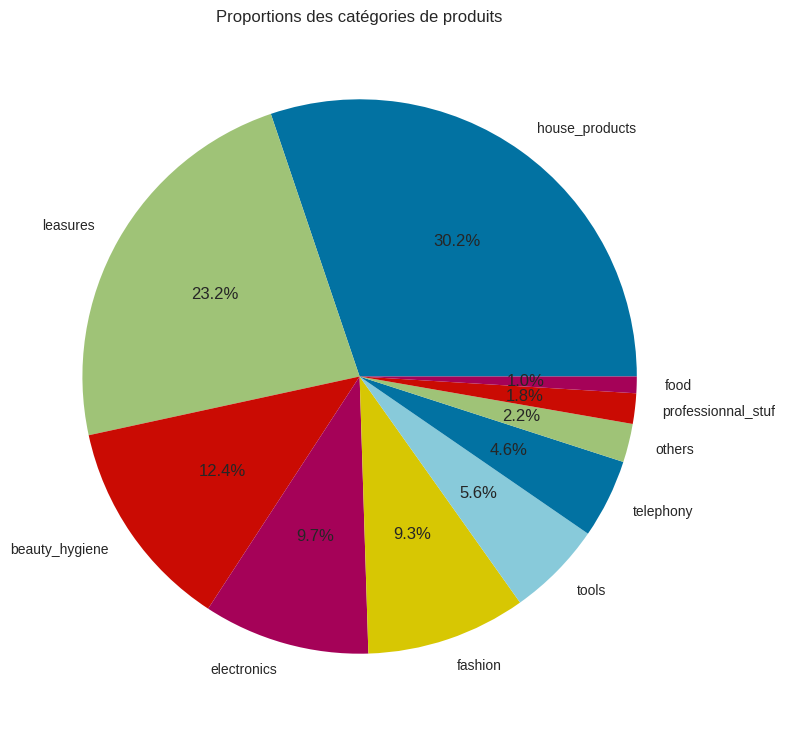

In [ ]:
plt.figure(figsize = (9, 9))
plt.pie(df['largest_product_category_name'].value_counts(), labels = df['largest_product_category_name'].value_counts().index, autopct='%1.1f%%')
plt.title("Proportions des catégories de produits")
plt.show()

On voit que les catégories 'house_products' et 'leasures' sont prédominantes. A l'inverse on a assez peu de produits dans les catégories 'food' et 'professionnal_stuf'.

In [ ]:
df.columns

Index(['nb_orders', 'last_purchase_date', 'first_purchase_date',
       'mean_delivery_delay', 'max_delivery_delay', 'mean_review_score',
       'max_review_score', 'min_review_score', 'largest_payment_type',
       'mean_payment_installments', 'max_payment_installments',
       'mean_nb_pdt_orders', 'max_nb_pdt_orders', 'total_price',
       'mean_order_price', 'largest_product_category_name'],
      dtype='object')

In [ ]:
# Modalités des moyens de paiements :
df['largest_payment_type'].value_counts()

credit_card    68406
boleto         18100
voucher         3544
debit_card      1430
not_defined        1
Name: largest_payment_type, dtype: int64

La modalité 'not defined' n'apportant aucune information, nous décidons de la supprimer du DataFrame :

In [ ]:
df.drop(df[df['largest_payment_type']=='not_defined'].index, axis = 0, inplace=True)

<ipython-input-21-102c389461e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['largest_payment_type']=='not_defined'].index, axis = 0, inplace=True)


#### 1.4. Création variable "Recency"

On crée une variable 'Recency' qui correspondra au nombre de jours passés depuis la date de dernier achat que comprend le dataset. Depuis donc la date de la dernière commande passée par un client.

In [ ]:
# On crée une variable "recency" correspondant au nombre de jours écoulés depuis la date dernière commande globale :
df["recency"] = (df["last_purchase_date"].max() - df["last_purchase_date"]).dt.days

<ipython-input-22-eab38424a23d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["recency"] = (df["last_purchase_date"].max() - df["last_purchase_date"]).dt.days


In [ ]:
df.head()

,nb_orders,last_purchase_date,first_purchase_date,mean_delivery_delay,max_delivery_delay,mean_review_score,max_review_score,min_review_score,largest_payment_type,mean_payment_installments,max_payment_installments,mean_nb_pdt_orders,max_nb_pdt_orders,total_price,mean_order_price,largest_product_category_name,recency
customer_unique_id,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,2018-05-10 10:56:27,4.132905,4.132905,5.0,5.0,5.0,credit_card,8.0,8.0,1.0,1.0,141.90,141.90,house_products,111
0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,2018-05-07 11:11:27,4.248125,4.248125,4.0,4.0,4.0,credit_card,1.0,1.0,1.0,1.0,27.19,27.19,beauty_hygiene,114
0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,2017-03-10 21:05:03,1.389734,1.389734,3.0,3.0,3.0,credit_card,8.0,8.0,1.0,1.0,86.22,86.22,house_products,536
0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,2017-10-12 20:29:41,11.108970,11.108970,4.0,4.0,4.0,credit_card,4.0,4.0,1.0,1.0,43.62,43.62,telephony,320
0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,2017-11-14 19:45:42,7.035463,7.035463,5.0,5.0,5.0,credit_card,6.0,6.0,1.0,1.0,196.89,196.89,telephony,287


#### 1.5. Création de variables binaires

On crée quelques variables binaires :     
- delivery_delay (1 = oui, 0 sinon);
- several_orders (1 = oui, 0 sinon);
- payment_installment (1 = oui, 0 sinon);
- order_last_month (1 = oui, 0 sinon);
- order_last_quarter (1 = oui, 0 sinon);
- order_last_year (1 = oui, 0 sinon).

In [ ]:
# Retard :
df["delivery_delay"] = (df["mean_delivery_delay"] < 0).astype(int)

# Plusieurs commandes :
df["several_orders"] = (df["nb_orders"] > 1).astype(int)

# Paiements en plusieurs fois :
df["payment_installment"] = (df["mean_payment_installments"] > 1).astype(int)

# Commande passée dans les 30 deniers jours :
df["order_last_month"] = (df["recency"] <= 30).astype(int)

# Commande passée dans les 90 deniers jours :
df["order_last_quarter"] = (df["recency"] <= 90).astype(int)

# Commande passée dans la dernière année :
df["order_last_year"] = (df["recency"] <= 365).astype(int)

<ipython-input-24-74a897dd172c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delivery_delay"] = (df["mean_delivery_delay"] < 0).astype(int)
<ipython-input-24-74a897dd172c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["several_orders"] = (df["nb_orders"] > 1).astype(int)
<ipython-input-24-74a897dd172c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
df.head()

,nb_orders,last_purchase_date,first_purchase_date,mean_delivery_delay,max_delivery_delay,mean_review_score,max_review_score,min_review_score,largest_payment_type,mean_payment_installments,...,total_price,mean_order_price,largest_product_category_name,recency,delivery_delay,several_orders,payment_installment,order_last_month,order_last_quarter,order_last_year
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,2018-05-10 10:56:27,4.132905,4.132905,5.0,5.0,5.0,credit_card,8.0,...,141.90,141.90,house_products,111,0,0,1,0,0,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,2018-05-07 11:11:27,4.248125,4.248125,4.0,4.0,4.0,credit_card,1.0,...,27.19,27.19,beauty_hygiene,114,0,0,0,0,0,1
0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,2017-03-10 21:05:03,1.389734,1.389734,3.0,3.0,3.0,credit_card,8.0,...,86.22,86.22,house_products,536,0,0,1,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,2017-10-12 20:29:41,11.108970,11.108970,4.0,4.0,4.0,credit_card,4.0,...,43.62,43.62,telephony,320,0,0,1,0,0,1
0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,2017-11-14 19:45:42,7.035463,7.035463,5.0,5.0,5.0,credit_card,6.0,...,196.89,196.89,telephony,287,0,0,1,0,0,1


In [ ]:
# Jeu de données pour tester la maintenance du modèle de clustering choisi :
df.to_csv("/content/drive/My Drive/Formation/Notebooks/jeu_donnees_clustering_maintenance.csv")

#### 1.6. Sélection d'un échantillon du dataset pour entrainer les modèles de clustering

Certains algorithmes de clustering nécessitant beaucoup de ressources lorsque le nombre de données est important, nous sélectionnons un échantillon de ces dernières pour la suite de notre travail.

Nous faisons le choix de garder l'ensemble des consommateurs ayant réalisé plus d'une commande, et prenons un pourcentage des autres.

In [ ]:
df_tmp1 = df[df["nb_orders"] > 1]
print(df_tmp1.shape)
df_tmp2 = df[df["nb_orders"] == 1].sample(frac=0.2, random_state=100)
print(df_tmp2.shape)

df1 = pd.concat([df_tmp1, df_tmp2], axis = 0)
print(df1.shape)

(2964, 23)
(17703, 23)
(20667, 23)


### 2. Analyse Exploratoire

#### 2.1. Analyse univariée :

In [ ]:
# Statistiques descriptives de nos variables :
df1.describe()

,nb_orders,mean_delivery_delay,max_delivery_delay,mean_review_score,max_review_score,min_review_score,mean_payment_installments,max_payment_installments,mean_nb_pdt_orders,max_nb_pdt_orders,total_price,mean_order_price,recency,delivery_delay,several_orders,payment_installment,order_last_month,order_last_quarter,order_last_year
count,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000
mean,1.160159,11.284851,11.861862,4.161916,4.212658,4.109079,2.958943,3.084821,1.153044,1.176078,182.428172,159.552510,246.412058,0.076208,0.143417,0.528572,0.065902,0.180916,0.758601
std,0.437957,9.397226,9.689728,1.254411,1.245778,1.315283,2.687224,2.840261,0.559692,0.624442,261.516620,232.455634,153.681935,0.265338,0.350506,0.499195,0.248117,0.384958,0.427942
min,1.000000,-134.984606,-134.984606,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,10.070000,10.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.803354,7.144010,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,66.685000,63.160000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,11.683084,12.225995,5.000000,5.000000,5.000000,2.000000,2.000000,1.000000,1.000000,117.580000,105.770000,227.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,16.197494,17.039554,5.000000,5.000000,5.000000,4.000000,4.000000,1.000000,1.000000,202.650000,175.960000,361.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,17.000000,108.424225,123.433403,5.000000,5.000000,5.000000,24.000000,24.000000,21.000000,21.000000,13664.080000,13664.080000,695.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Comme indiqué dans notre "lettre de mission", on voit qu'une grande majorité de clients n'a passé qu'une seule commande. Le maximum est néanmoins à 17.
On a une variance assez élevée concernant les prix et la recence.
Les review score moyen sont assez élevé dans la mesure où le 1er quartile est égale à 4 et la moyenne > 4.

In [ ]:
df1.describe(exclude = [np.number])

<ipython-input-29-0c1d6b8592df>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe(exclude = [np.number])
<ipython-input-29-0c1d6b8592df>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe(exclude = [np.number])


,last_purchase_date,first_purchase_date,largest_payment_type,largest_product_category_name
count,20667,20667,20667,20667
unique,20653,20653,4,10
top,2017-12-06 12:41:52,2018-05-07 21:42:08,credit_card,house_products
freq,2,2,15413,6291
first,2016-10-03 09:44:50,2016-10-03 16:56:50,NaN,NaN
last,2018-08-29 14:18:23,2018-10-16 20:16:02,NaN,NaN


Nous pouvons de nouveaux visualiser la répartition des modalités de nos variables catégorielles :    

Text(0.5, 1.0, 'Proportions des moyens de paiements privilégiés')

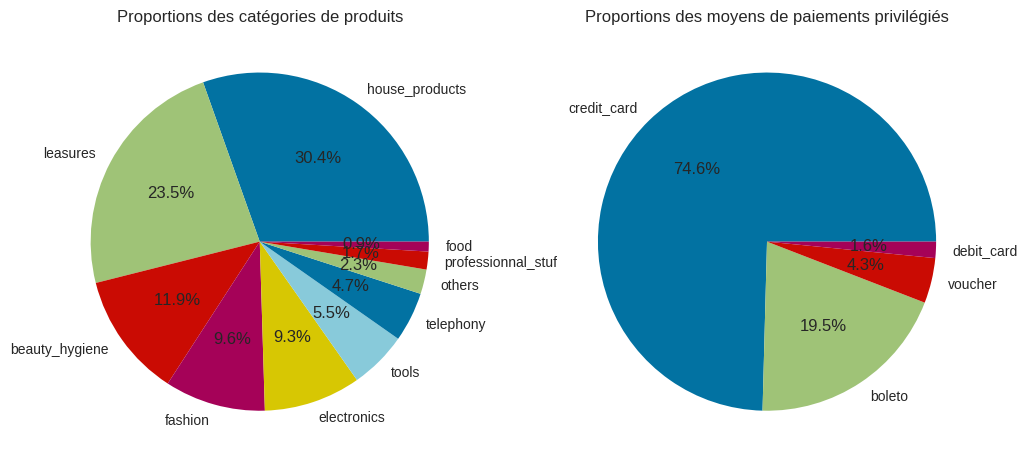

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Premier sous-graphique
axes[0].pie(df1['largest_product_category_name'].value_counts(), labels = df1['largest_product_category_name'].value_counts().index, autopct='%1.1f%%')
axes[0].set_title("Proportions des catégories de produits")

# Deuxième sous-graphique
axes[1].pie(df1['largest_payment_type'].value_counts(), labels = df1['largest_payment_type'].value_counts().index, autopct='%1.1f%%')
axes[1].set_title("Proportions des moyens de paiements privilégiés")

Pour les catégories de produits on a peu près la même répartition que dans le dataset global. Avec toujours une prédominance de 'house_products' et 'leasures'.

Concernant les moyens de paiement on note une large prépondérance de la carte de crédit.

On peut regarder les proportions de clients ayant effectué une ou plusieurs commandes dans le mois, le trimestre et l'année passée :

Text(0.5, 1.0, 'Proportions des clients ayant commandé ou non lors de la dernière année')

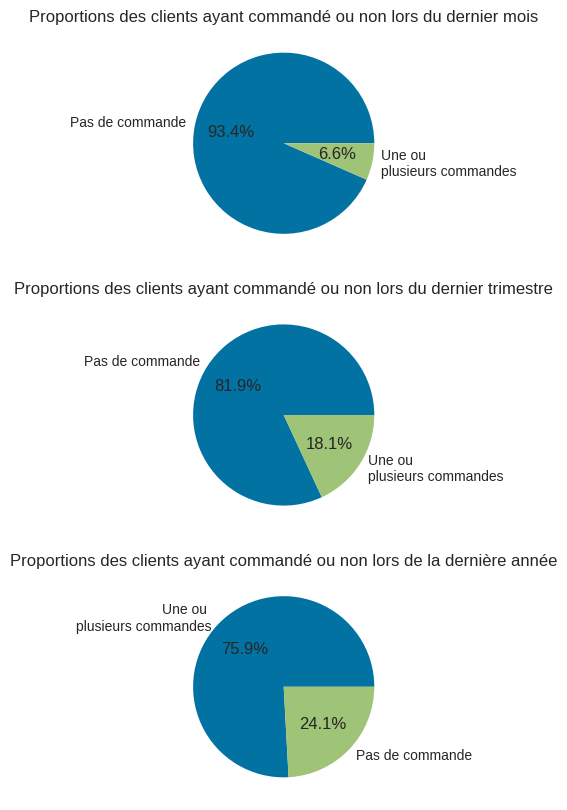

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(16, 10))

# Premier sous-graphique
axes[0].pie(df1['order_last_month'].value_counts(), labels = ["Pas de commande", "Une ou \nplusieurs commandes"], autopct='%1.1f%%')
axes[0].set_title("Proportions des clients ayant commandé ou non lors du dernier mois")

# Deuxième sous-graphique
axes[1].pie(df1['order_last_quarter'].value_counts(), labels = ["Pas de commande", "Une ou \nplusieurs commandes"], autopct='%1.1f%%')
axes[1].set_title("Proportions des clients ayant commandé ou non lors du dernier trimestre")

axes[2].pie(df1['order_last_year'].value_counts(), labels = ["Une ou \nplusieurs commandes", "Pas de commande"], autopct='%1.1f%%')
axes[2].set_title("Proportions des clients ayant commandé ou non lors de la dernière année")

On voit que'assez peu de commandes ont été réalisées lors du dernier mois, environ 1 cinquième des commandes ont été passées lors du dernier trimestre et un peu plus de 3/4 des commandes ont été passées lors de la dernière année comprise dans le jeu de donnée.

In [ ]:
df1["delivery_delay"].value_counts()

0    19092
1     1575
Name: delivery_delay, dtype: int64

Text(0.5, 1.0, 'Proportion de retards dans les livraisons')

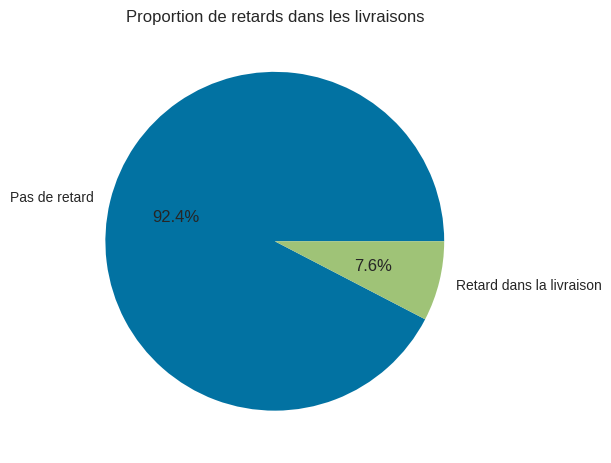

In [ ]:
plt.pie(df1["delivery_delay"].value_counts(), labels = ["Pas de retard", "Retard dans la livraison"], autopct='%1.1f%%')
plt.title('Proportion de retards dans les livraisons')

Text(0.5, 1.0, 'Proportion des clients ayant passé un commande ou plusieurs commandes')

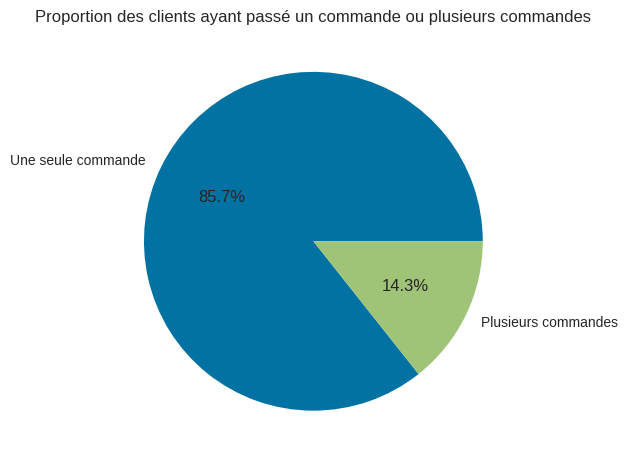

In [ ]:
plt.pie(df1['several_orders'].value_counts(), labels = ["Une seule commande", "Plusieurs commandes"], autopct='%1.1f%%')
plt.title('Proportion des clients ayant passé une commande ou plusieurs commandes')

**Distribution des variables numériques :**

<Axes: xlabel='nb_orders', ylabel='count'>

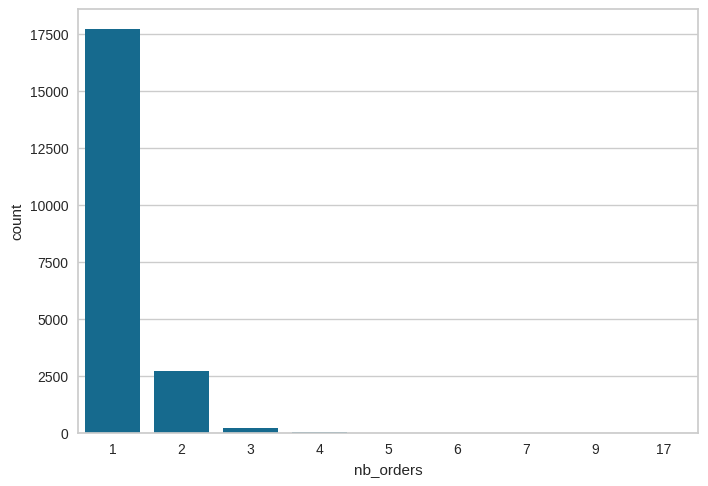

In [ ]:
# Nombre de commandes :
sns.countplot(df1, x= "nb_orders")

Comme dit plus haut on a une écrasante majorité de clients n'ayant réalisé qu'une seule commande. Cela créé une distribution étalée vers la droite. Il nous faudra réaliser quelques transformation avant la modélisation, potentiellement passage au log + standardisation.

In [ ]:
df1.columns

Index(['nb_orders', 'last_purchase_date', 'first_purchase_date',
       'mean_delivery_delay', 'max_delivery_delay', 'mean_review_score',
       'max_review_score', 'min_review_score', 'largest_payment_type',
       'mean_payment_installments', 'max_payment_installments',
       'mean_nb_pdt_orders', 'max_nb_pdt_orders', 'total_price',
       'mean_order_price', 'largest_product_category_name', 'recency',
       'delivery_delay', 'several_orders', 'payment_installment',
       'order_last_month', 'order_last_quarter', 'order_last_year'],
      dtype='object')

<Axes: xlabel='total_price', ylabel='Count'>

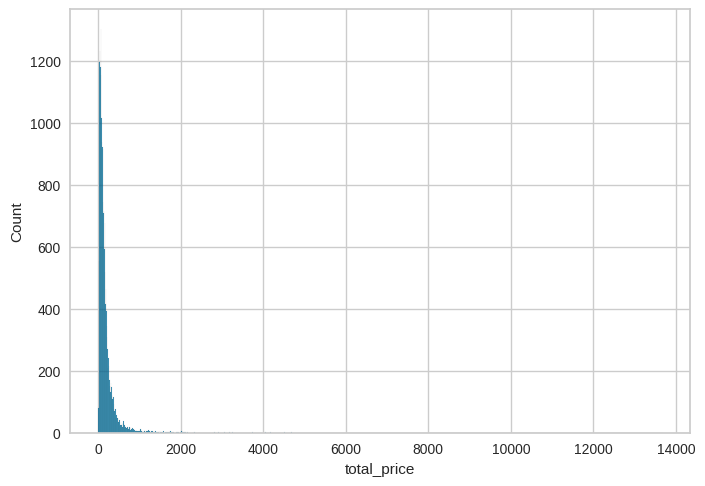

In [ ]:
# Prix total :
sns.histplot(df1, x = 'total_price')

On voit qu'ici aussi la distribution est étalée vers la droite. La plupart des montants sont en fait assez faible et le maximum à plus de 13000 reals est très éloigné du reste des valeurs.

Voyons ce que donne la distribution passée au log :

<Axes: xlabel='total_price', ylabel='Count'>

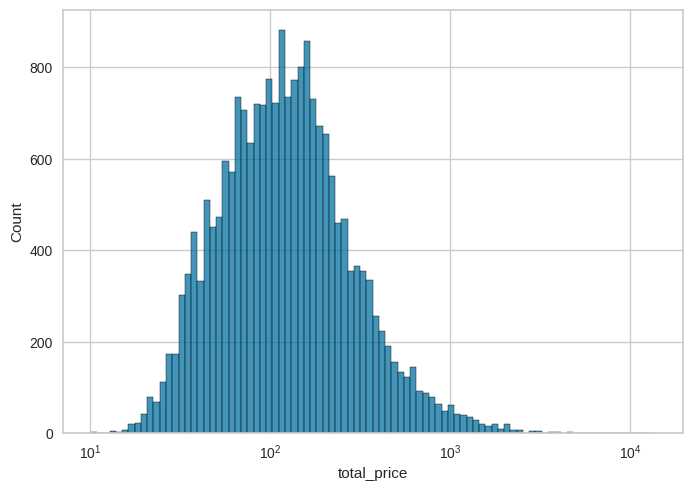

In [ ]:
sns.histplot(df1, x = 'total_price', log_scale = True)

Le passage au log de la variable "total_price" rapproche sa distribution de celle d'une loi normale.

<Axes: xlabel='total_price'>

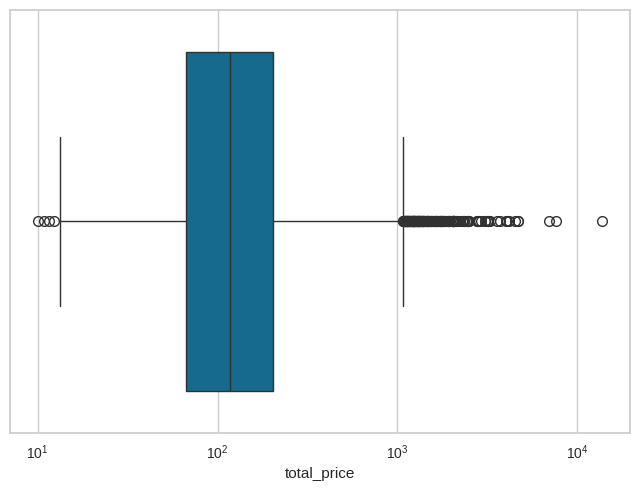

In [ ]:
sns.boxplot(df1, x = "total_price", log_scale = True)

La représentation de la distribution par boxplot nous indique que la variance de cette variable est assez élevée, comme nous avions déjà pu le voir via les statistiques descriptives.

In [ ]:
df1.columns

Index(['nb_orders', 'last_purchase_date', 'first_purchase_date',
       'mean_delivery_delay', 'max_delivery_delay', 'mean_review_score',
       'max_review_score', 'min_review_score', 'largest_payment_type',
       'mean_payment_installments', 'max_payment_installments',
       'mean_nb_pdt_orders', 'max_nb_pdt_orders', 'total_price',
       'mean_order_price', 'largest_product_category_name', 'recency',
       'delivery_delay', 'several_orders', 'payment_installment',
       'order_last_month', 'order_last_quarter', 'order_last_year'],
      dtype='object')

<Axes: xlabel='mean_review_score', ylabel='Count'>

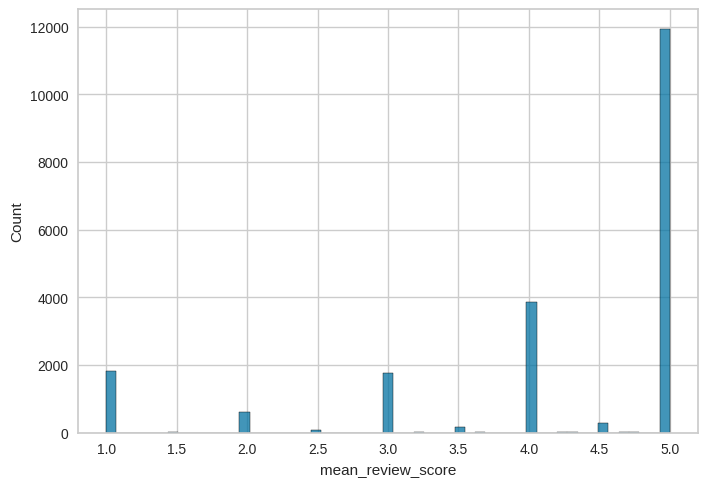

In [ ]:
# Score moyen review :
sns.histplot(df1, x = 'mean_review_score')

On retrouve ici ce qu'on a vu dans les statistiques descriptives avec une majorité de review_score_moyen égale à 5. Et une large majorité surpérieure ou égale à 4.

<Axes: xlabel='mean_payment_installments', ylabel='Count'>

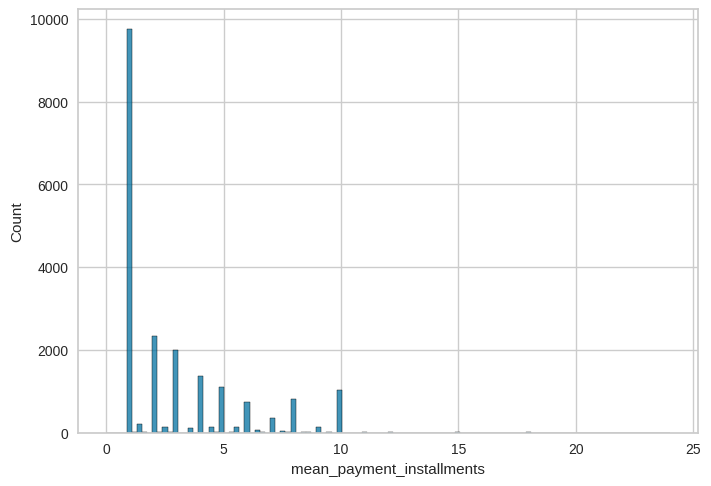

In [ ]:
# Moyenne nombre de paiements :
sns.histplot(df1, x = 'mean_payment_installments')

On voit qu'on a majoritairement un nombre de paiement situé entre 1 et 5.

<Axes: xlabel='recency', ylabel='Count'>

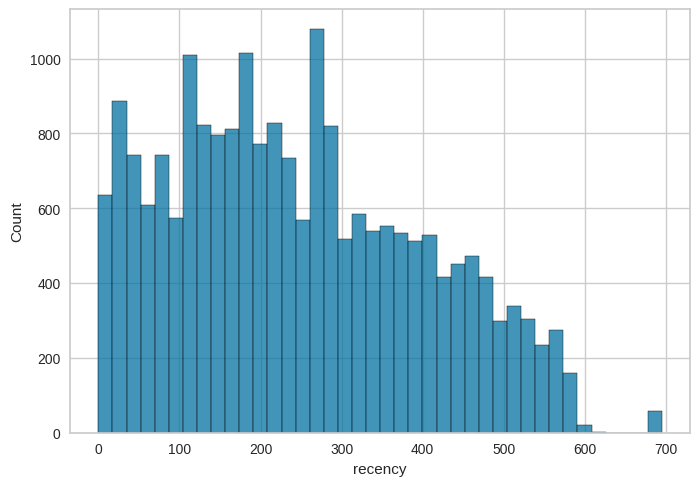

In [ ]:
# Recence :
sns.histplot(df1, x = "recency")

On a une répartition des commandes plutôt centrée sur la dernière année comprise dans le jeu de donnée à savoir 2018. Même si on voit quelques commandes qui datent d'un peu plus de 2 ans.

In [ ]:
df1.columns

Index(['nb_orders', 'last_purchase_date', 'first_purchase_date',
       'mean_delivery_delay', 'max_delivery_delay', 'mean_review_score',
       'max_review_score', 'min_review_score', 'largest_payment_type',
       'mean_payment_installments', 'max_payment_installments',
       'mean_nb_pdt_orders', 'max_nb_pdt_orders', 'total_price',
       'mean_order_price', 'largest_product_category_name', 'recency',
       'delivery_delay', 'several_orders', 'payment_installment',
       'order_last_month', 'order_last_quarter', 'order_last_year'],
      dtype='object')

<Axes: xlabel='mean_nb_pdt_orders', ylabel='Count'>

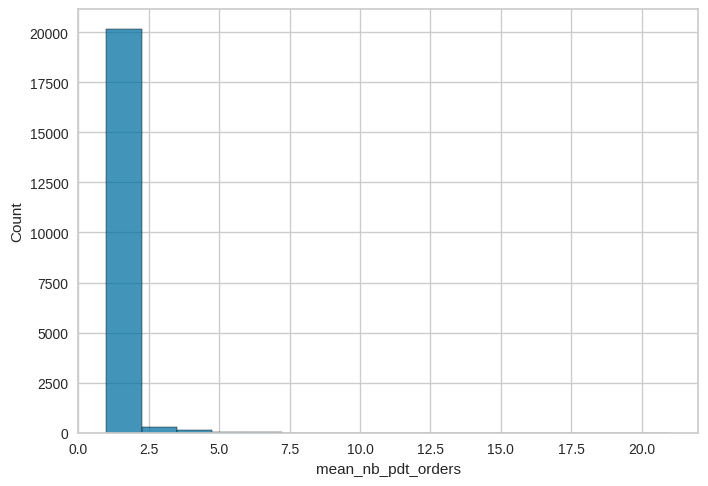

In [ ]:
# Moyenne de produits par commande :
sns.histplot(df1, x = 'mean_nb_pdt_orders')

On voit que beaucoup de commandes ne comprennent en moyenne qu'un seul ou assez peu de produits.

<Axes: xlabel='mean_nb_pdt_orders', ylabel='Count'>

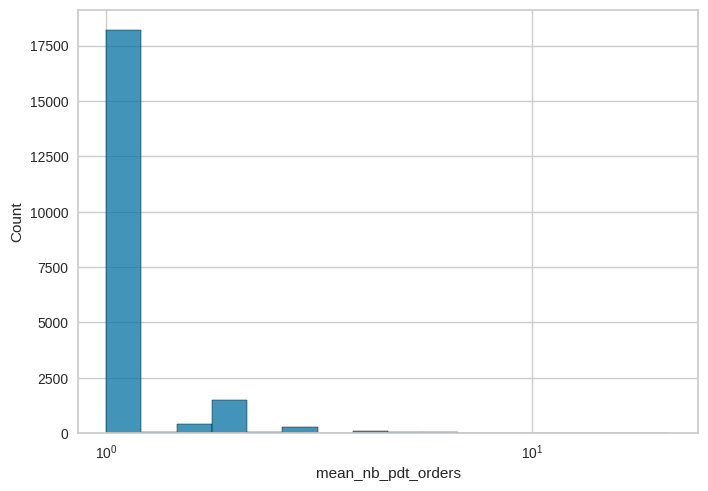

In [ ]:
# Moyenne de produits par commande (log) :
sns.histplot(df1, x = 'mean_nb_pdt_orders', log_scale=True)

<Axes: xlabel='mean_delivery_delay', ylabel='Count'>

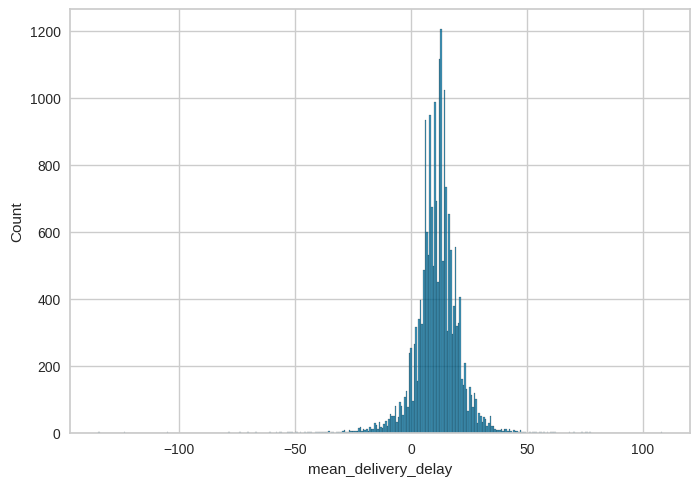

In [ ]:
# Avance ou retard de livraison (les retards ont des valeurs négatives ici) :
sns.histplot(df1, x = 'mean_delivery_delay')

<Axes: xlabel='mean_delivery_delay', ylabel='Count'>

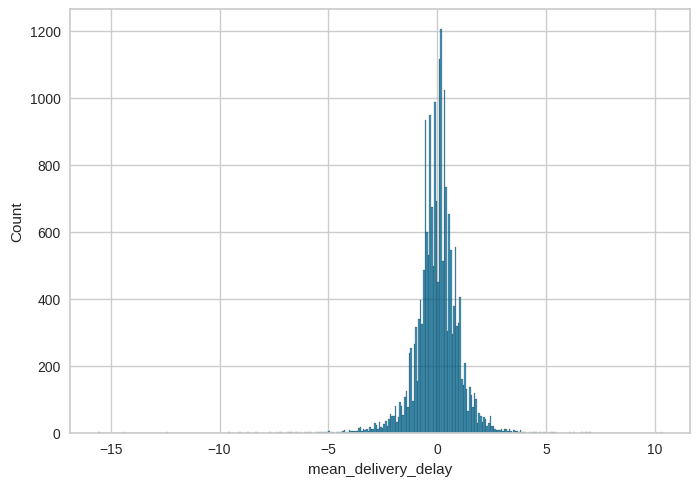

In [ ]:
from scipy.stats import zscore
sns.histplot(zscore(df1['mean_delivery_delay']))

La distibution de la variable se rapproche de celle d'une loi normale, même si certaines valeurs sont assez éloignées de la moyenne.

#### 2.2. Analyse bivariée :

<Axes: xlabel='nb_orders', ylabel='total_price'>

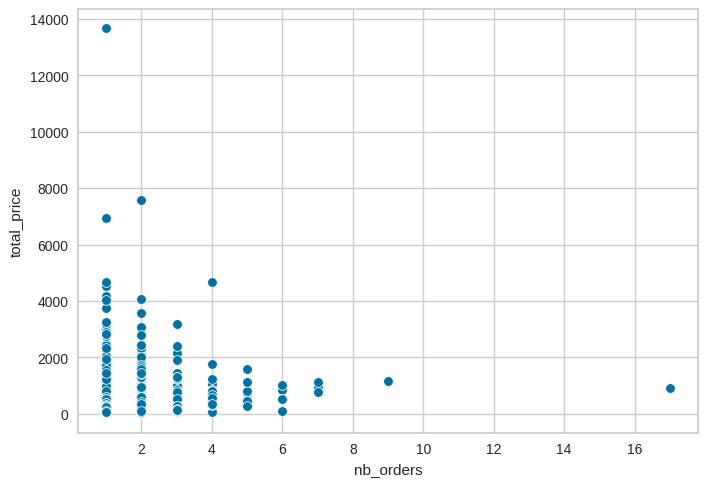

In [ ]:
# Nombre commandes et prix total des commandes :
sns.scatterplot(df1, x = "nb_orders", y = "total_price")

On pourrait noter une légère corrélation négative entre ces 2 variables : plus le nombre de commandes est élevé et moins le prix total dépensé l'est.

<Axes: xlabel='nb_orders', ylabel='recency'>

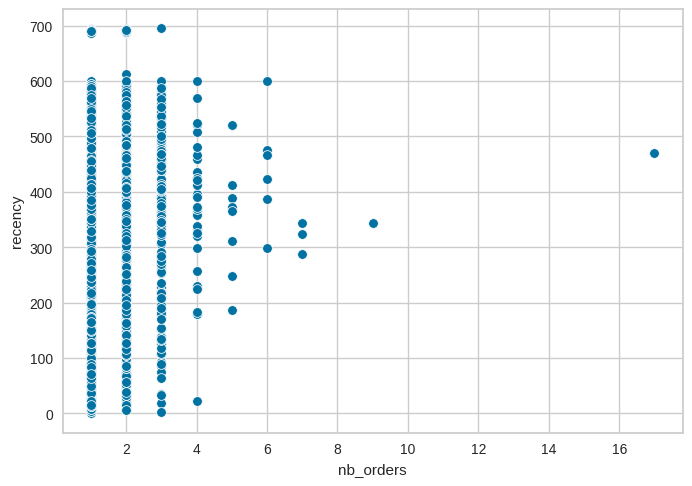

In [ ]:
# Nombre commandes et récence :
sns.scatterplot(df1, x = "nb_orders", y = "recency")

Ici on ne note pas de corrélation particulière.

<Axes: xlabel='total_price', ylabel='recency'>

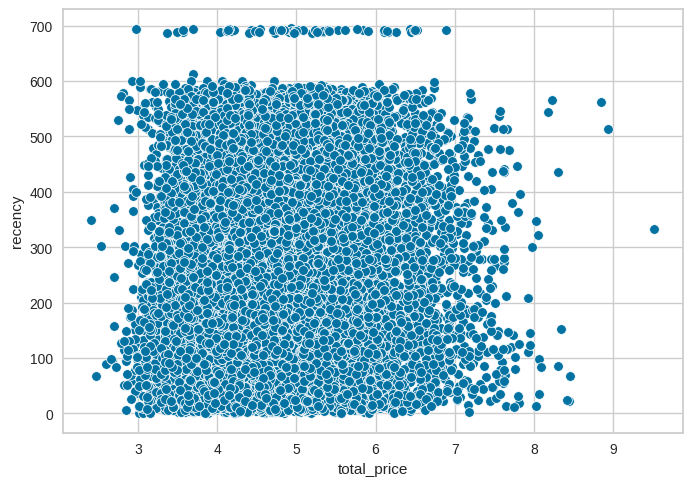

In [ ]:
# Récence et prix total :
sns.scatterplot(df1, x = np.log1p(df1["total_price"]), y = "recency")

Là non plus on ne note pas de corrélation particulière.

In [ ]:
df1.columns

Index(['nb_orders', 'last_purchase_date', 'first_purchase_date',
       'mean_delivery_delay', 'max_delivery_delay', 'mean_review_score',
       'max_review_score', 'min_review_score', 'largest_payment_type',
       'mean_payment_installments', 'max_payment_installments',
       'mean_nb_pdt_orders', 'max_nb_pdt_orders', 'total_price',
       'mean_order_price', 'largest_product_category_name', 'recency',
       'delivery_delay', 'several_orders', 'payment_installment',
       'order_last_month', 'order_last_quarter', 'order_last_year'],
      dtype='object')

<Axes: xlabel='total_price', ylabel='Count'>

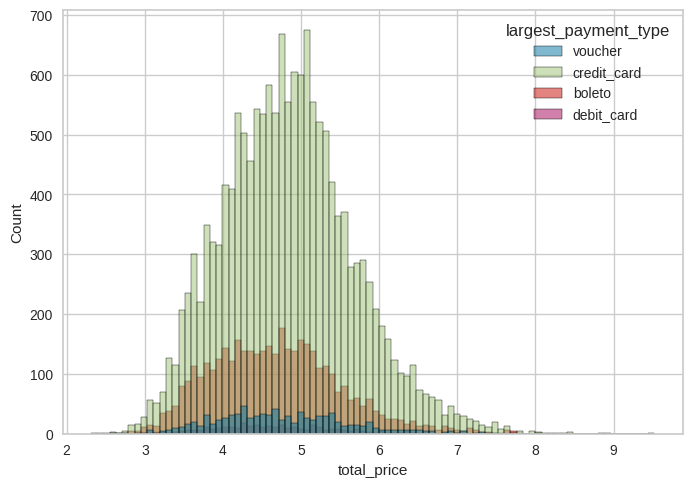

In [ ]:
# Prix total et moyen de paiement :
sns.histplot(df1, x = np.log(df1["total_price"]), hue = 'largest_payment_type')

<Axes: xlabel='total_price', ylabel='largest_product_category_name'>

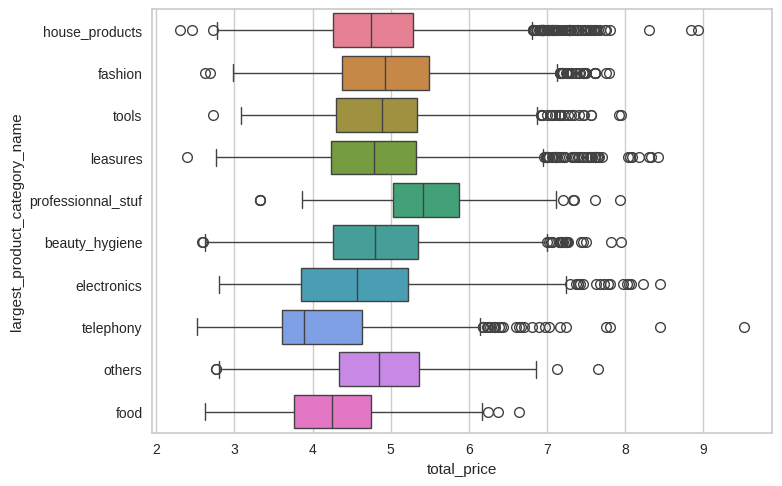

In [ ]:
# Prix et catégorie de produits :
sns.boxplot(df1, x = np.log(df1["total_price"]), y = 'largest_product_category_name', hue = 'largest_product_category_name')

On note une grande disparité des prix totaux dans chaque catégorie de produits.

Sinon les prix médians entre chaque catégorie sont finalement assez proches.

<Axes: xlabel='total_price', ylabel='largest_payment_type'>

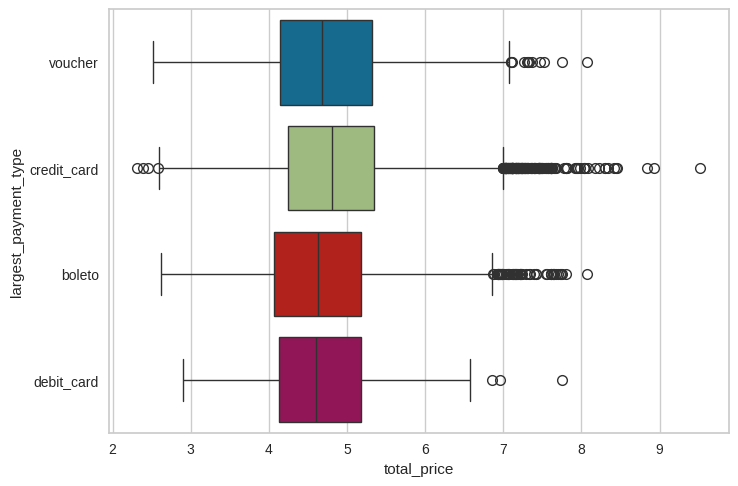

In [ ]:
# Prix et moyen de paiement privilégié :
sns.boxplot(df1, x = np.log(df1["total_price"]), y = 'largest_payment_type', hue = 'largest_payment_type')

On voit assez peu d'écart concernant le moyen de paiement privilégié en fonction du montant total dépensé, même si pour les plus gros paiements la carte de crédit semble légèrement privilégiée.

<Axes: xlabel='nb_orders', ylabel='mean_review_score'>

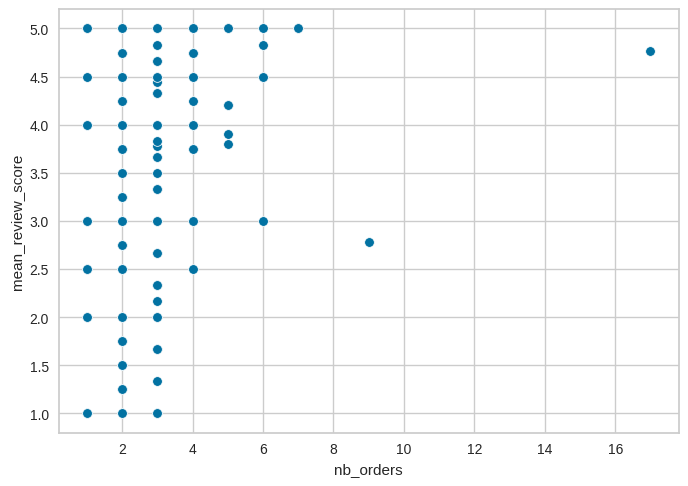

In [ ]:
# Nombre de commandes et review_score_moyen
sns.scatterplot(df1, x = "nb_orders", y = "mean_review_score")

Là non plus on ne distingue pas de corrélation claire.

<Axes: xlabel='total_price', ylabel='mean_review_score'>

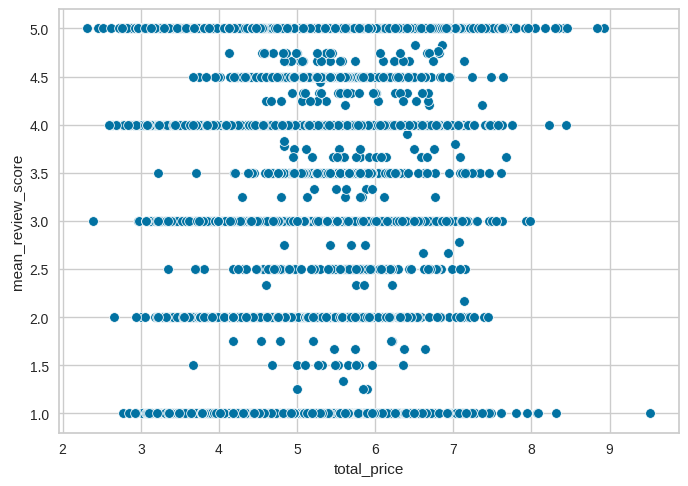

In [ ]:
# Prix total et review_score_moyen
sns.scatterplot(df1, x = np.log(df1["total_price"]), y = "mean_review_score")

Là non plus on ne distingue pas de corrélation claire.

#### 2.3. Analyse multivariée :

In [ ]:
df1.columns

Index(['nb_orders', 'last_purchase_date', 'first_purchase_date',
       'mean_delivery_delay', 'max_delivery_delay', 'mean_review_score',
       'max_review_score', 'min_review_score', 'largest_payment_type',
       'mean_payment_installments', 'max_payment_installments',
       'mean_nb_pdt_orders', 'max_nb_pdt_orders', 'total_price',
       'mean_order_price', 'largest_product_category_name', 'recency',
       'delivery_delay', 'several_orders', 'payment_installment',
       'order_last_month', 'order_last_quarter', 'order_last_year'],
      dtype='object')

<Axes: >

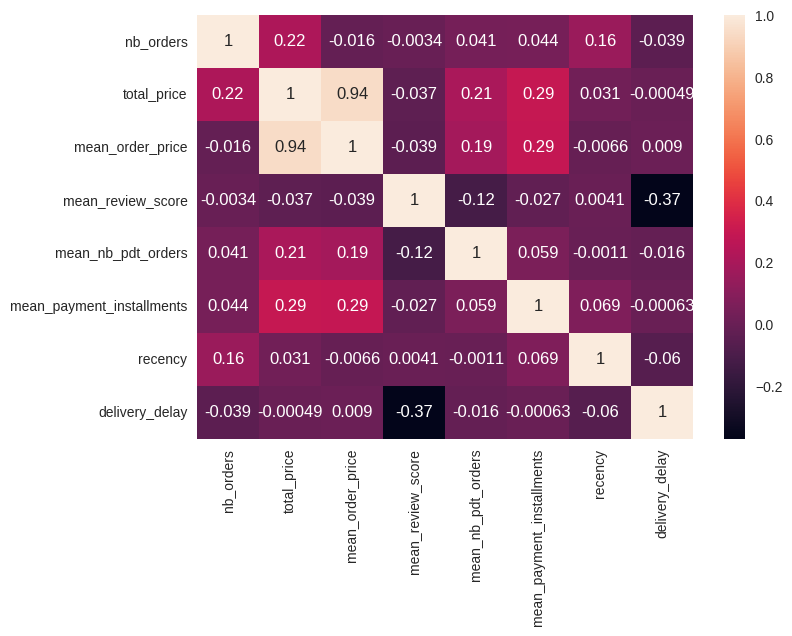

In [ ]:
# Heatmap de corrélation des variables numériques :
sns.heatmap(df1[['nb_orders', 'total_price', 'mean_order_price', 'mean_review_score', 'mean_nb_pdt_orders', 'mean_payment_installments', 'recency', 'delivery_delay']].corr(), annot = True)

On note de faibles corrélations positives entre le nombre de commandes et le montant total dépensé, ainsi qu'entre le nombre de commandes et la récence.
On a également une corrélation positive entre le montant total dépensé et le nombre de produits par commandes. Ainsi qu'entre le montant total dépensé et le nombre d'échelonnements du paiement.

On note une corrélation négative intéressante entre le retard de livraison et la moyenne du review_score.

In [ ]:
df1.to_csv("/content/drive/My Drive/Formation/Notebooks/jeu_donnees_clustering.csv")